# Sharing Data

PyProBE makes sharing data simple and straightforward. This is a simple example to demonstrate the process.

First we will import some sample data:

In [1]:
%%capture
%pip install matplotlib

In [2]:
import pyprobe
import os
import shutil
from pprint import pprint

%matplotlib inline

# Describe the cell. Required fields are 'Name'.
info_dictionary = {
    "Name": "Sample cell",
    "Chemistry": "NMC622",
    "Nominal Capacity [Ah]": 0.04,
    "Cycler number": 1,
    "Channel number": 1,
}

# Create a cell object
cell = pyprobe.Cell(info=info_dictionary)

data_directory = "../../../tests/sample_data/neware"

cell.add_procedure(
    procedure_name="Sample",
    folder_path=data_directory,
    filename="sample_data_neware.parquet",
)

We can then use the `archive()` method of the cell object. This stores all attributes of the `cell` object into a single folder. The data is stored as `.parquet` files and the metadata is stored in `.json` files.

In [3]:
cell.archive(path="sample_archive")
os.listdir(".")

['analysing-GITT-data.ipynb',
 'comparing-pyprobe-performance.ipynb',
 'sharing-data.ipynb',
 'plotting.ipynb',
 'providing-valid-inputs.ipynb',
 'examples.rst',
 'sample_archive',
 'ocv-fitting.ipynb',
 'differentiating-voltage-data.ipynb',
 'working-with-pybamm-models.ipynb',
 'getting-started.ipynb',
 'filtering-data.ipynb']

You can choose to compress the folder by adding `.zip` to the path:

In [4]:
cell.archive(path="sample_archive.zip")
os.listdir(".")

['sample_archive.zip',
 'analysing-GITT-data.ipynb',
 'comparing-pyprobe-performance.ipynb',
 'sharing-data.ipynb',
 'plotting.ipynb',
 'providing-valid-inputs.ipynb',
 'examples.rst',
 'ocv-fitting.ipynb',
 'differentiating-voltage-data.ipynb',
 'working-with-pybamm-models.ipynb',
 'getting-started.ipynb',
 'filtering-data.ipynb']

You can then retrieve the archived object with the `pyprobe.load_archive()` method:

In [5]:
saved_cell = pyprobe.load_archive("sample_archive.zip")
pprint(saved_cell.info)

{'Channel number': 1,
 'Chemistry': 'NMC622',
 'Cycler number': 1,
 'Name': 'Sample cell',
 'Nominal Capacity [Ah]': 0.04}


<Axes: xlabel='Time [hr]'>

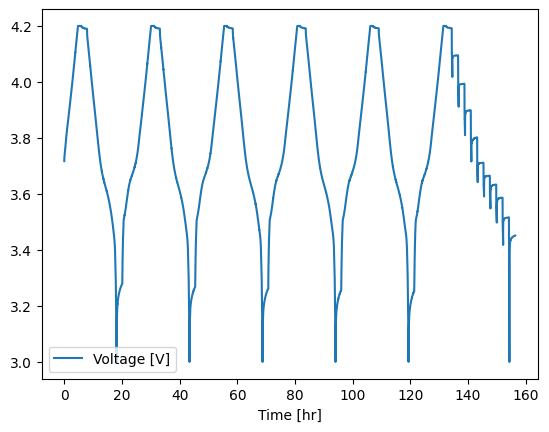

In [6]:
saved_cell.procedure["Sample"].plot(x="Time [hr]", y="Voltage [V]")

Clean up after example

In [7]:
shutil.rmtree("sample_archive")